# Mask Identifier by using CNN model

## Mounting of google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing of libraries

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from keras.layers import Conv2D,MaxPooling2D,SpatialDropout2D,Flatten,Dropout,Dense
from keras.models import Sequential,load_model
from keras.preprocessing import image
import cv2

## Importing of data

In [ ]:
# setting data path for train, test and validate

train_data_path = '/content/drive/MyDrive/Dataset/Mask Identifier/train'
categories = os.listdir(train_data_path)

test_data_path = '/content/drive/MyDrive/Dataset/Mask Identifier/test'
val_data_path = '/content/drive/MyDrive/Dataset/Mask Identifier/validate'

In [ ]:
# files with mask

files_mask = os.listdir(train_data_path+'/mask')

# confirm the files
print(files_mask[0:5])
print(files_mask[-5:])

['train_00000092.jpg', 'train_00000009.jpg', 'train_00000002.jpg', 'train_00000017.jpg', 'train_00000032.jpg']
['train_661.jpg', 'train_667.jpg', 'train_681.jpg', 'train_716.jpg', 'train_714.jpg']


In [ ]:
# files without mask

files_no_mask = os.listdir(train_data_path+'/no_mask')

# confirm the files
print(files_no_mask[0:5])
print(files_no_mask[-5:])


['train_68.jpg', 'train_96.jpg', 'train_95.jpg', 'train_82.jpg', 'train_69.jpg']
['train_47.jpg', 'train_64.jpg', 'train_65.jpg', 'train_35.jpg', 'train_48.jpg']


## Categorising labels

In [ ]:
print("Number of mask images:", len(files_mask))
print("Number of without mask images:", len(files_no_mask))

Number of mask images: 154
Number of without mask images: 159


In [ ]:
mask_label = [1] * 154
no_mask_label = [0] * 159
print(len(mask_label))
print(len(no_mask_label))

154
159


In [ ]:
# setting labels

labels = mask_label + no_mask_label
print(len(labels))
print(labels[0:5])
print(labels[-5:])

313
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


## Plotting some image

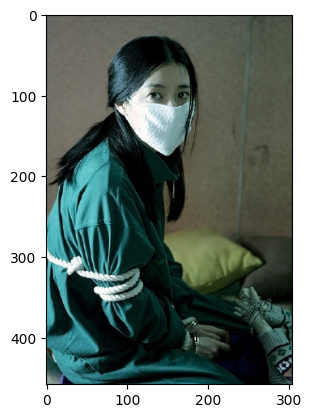

In [ ]:
# mask image
img = mpimg.imread(train_data_path+'/mask/'+'train_00000020.jpg')
imgplot = plt.imshow(img)
plt.show()

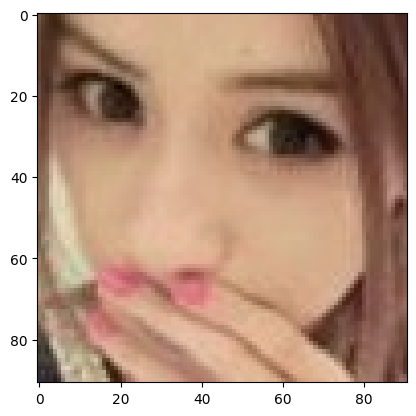

In [ ]:
# no mask image
img = mpimg.imread(train_data_path+'/no_mask/'+'train_3517.jpg')
imgplot = plt.imshow(img)
plt.show()

## Data Preparation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [ ]:
train_df = train.flow_from_directory(train_data_path,
                                     target_size=(150,150),
                                     batch_size=16,
                                     class_mode='binary')

test_df = test.flow_from_directory(test_data_path,
                                     target_size=(150,150),
                                     batch_size=16,
                                     class_mode='binary')

Found 313 images belonging to 2 classes.
Found 161 images belonging to 2 classes.


In [ ]:
# defining image plot
def plotimage(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

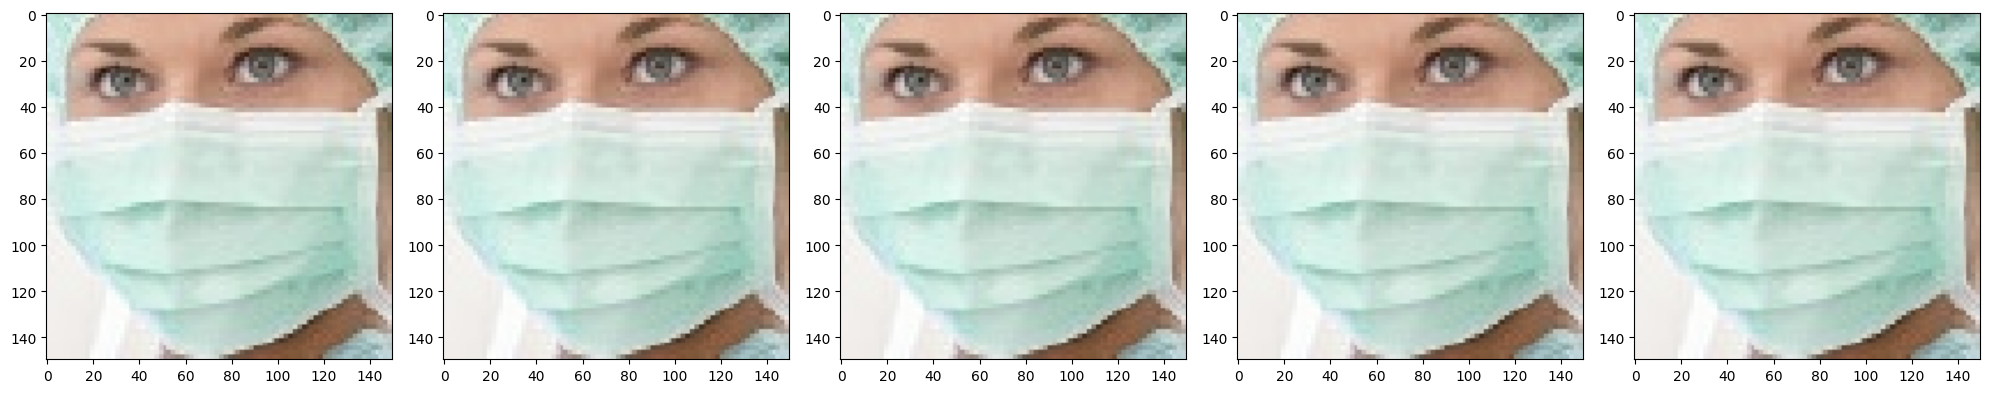

In [ ]:
images = [train_df[0][0][0] for i in range(5)]
plotimage(images)

## Building the CNN model


In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# viewing the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9248)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         924,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 944,393 (3.60 MB)

 Trainable params: 944,393 (3.60 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
#fitting the model

cnn_model = model.fit(train_df, validation_data=test_df, epochs=10)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 108s 4s/step - accuracy: 0.5653 - loss: 0.7550 - val_accuracy: 0.7950 - val_loss: 0.3959
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 650ms/step - accuracy: 0.8078 - loss: 0.4298 - val_accuracy: 0.7950 - val_loss: 0.4873
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 812ms/step - accuracy: 0.8686 - loss: 0.3339 - val_accuracy: 0.8012 - val_loss: 0.3782
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 749ms/step - accuracy: 0.9010 - loss: 0.2636 - val_accuracy: 0.8696 - val_loss: 0.3451
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 665ms/step - accuracy: 0.9399 - loss: 0.1584 - val_accuracy: 0.8634 - val_loss: 0.3544
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 591ms/step - accuracy: 0.9168 - loss: 0.1917 - val_accuracy: 0.8199 - val_loss: 0.4984
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 579ms/step - accuracy: 0.9788 - loss: 0.0870 - val_accuracy: 0.7764 - val_loss: 0.7876
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 652ms/step - accuracy: 0.9466 - loss: 0.1382 - val_accuracy: 0.8012 

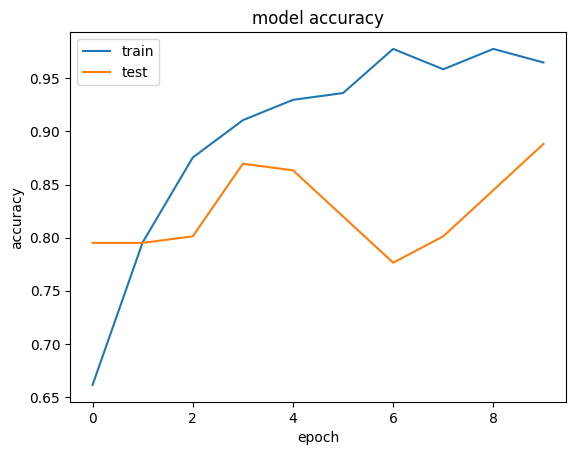

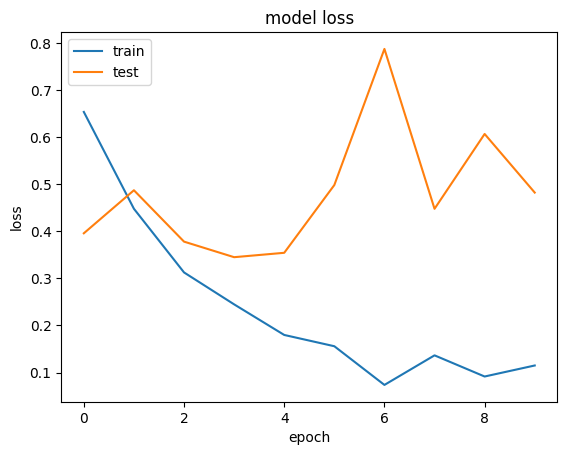

In [ ]:
# observing the changes in accuracy and loss over the different epochs

plt.plot(cnn_model.history['accuracy'])
plt.plot(cnn_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(cnn_model.history['loss'])
plt.plot(cnn_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## Evaluate CNN model

In [ ]:
# evaluate the model

model_evaluate = model.evaluate(test_df)
print(f"Model Accuracy: {model_evaluate[1] * 100 : 0.2f} %")

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - accuracy: 0.9060 - loss: 0.4184
Model Accuracy:  88.82 %


## Predictions and Testing of model

In [ ]:
prediction=model.predict(test_df)
print(prediction[0])

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step
[0.00013319]


In [ ]:
def predict(image_location):
  test_image=image.load_img(image_location, target_size = (150,150))
  plt.imshow(test_image,cmap='gray')
  test_image =image.img_to_array(test_image)
  test_image= test_image/255
  test_image = np.expand_dims(test_image, axis = 0)
  images = np.vstack([test_image])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.7:
    print("The person in the image is not wearing a mask")
  else:
    print('The person in the image is wearing a mask')

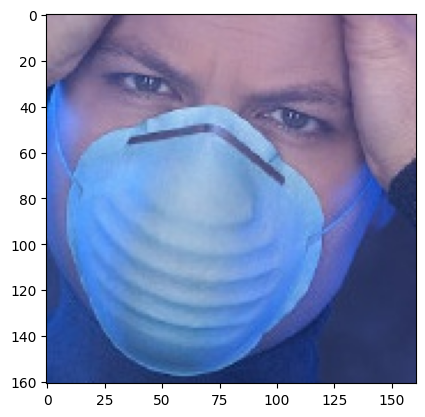

In [ ]:
# plotting validation image (mask)
img = mpimg.imread(val_data_path +'/val_224.jpg')
imgplot = plt.imshow(img)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
[0.00014036]
The person in the image is wearing a mask


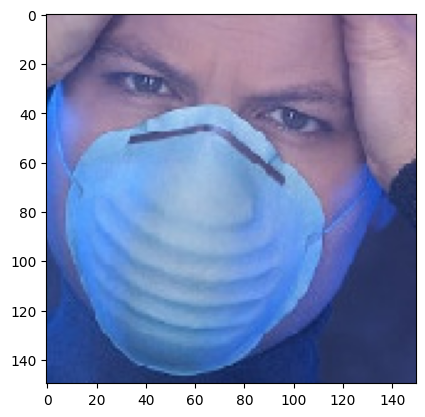

In [ ]:
# the model should predict this person is wearing a mask

predict(val_data_path +'/val_224.jpg')

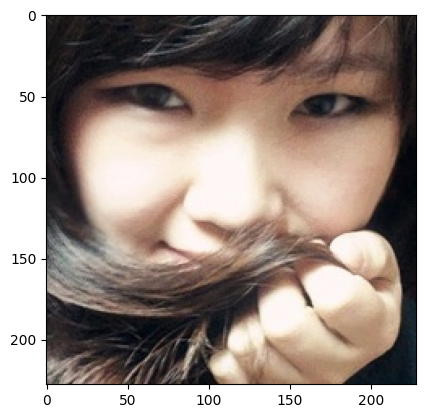

In [ ]:
# plotting validation image (no mask)
img = mpimg.imread(val_data_path +'/val_3702.jpg')
imgplot = plt.imshow(img)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[0.8007192]
The person in the image is not wearing a mask


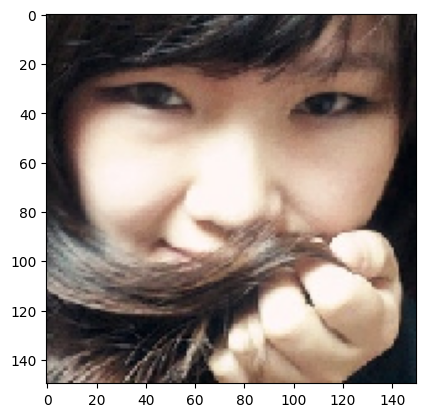

In [ ]:
# the model should predict this person is not wearing a mask
predict(val_data_path +'/val_3702.jpg')

Testing the model with images of person wearing a mask but incorrectly

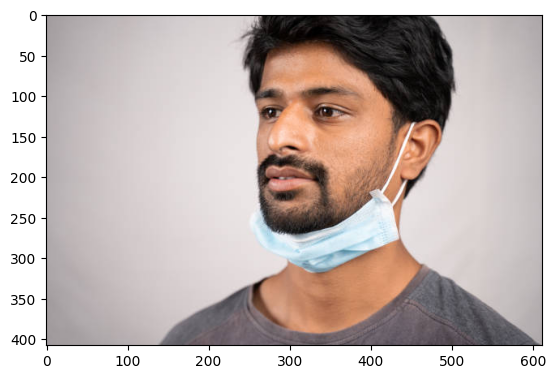

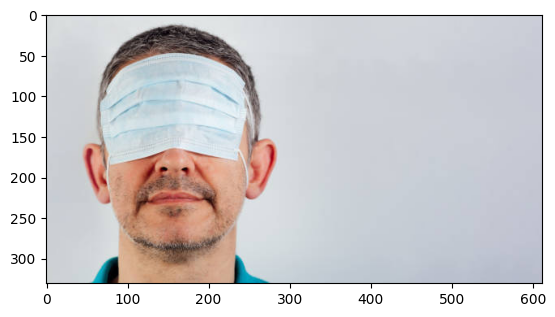

In [ ]:
# incorrect images

img = mpimg.imread(val_data_path +'/val_003.jpg')
imgplot = plt.imshow(img)
plt.show()

img = mpimg.imread(val_data_path +'/val_004.jpg')
imgplot = plt.imshow(img)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[0.03961031]
The person in the image is wearing a mask


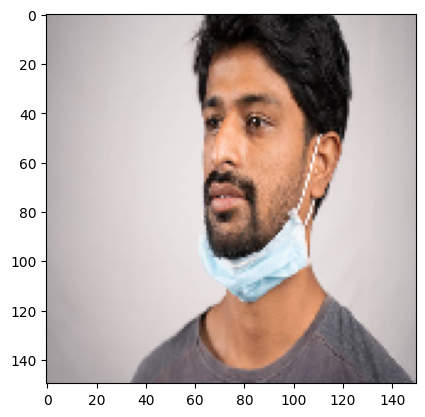

In [ ]:
predict(val_data_path +'/val_003.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[0.06986907]
The person in the image is wearing a mask


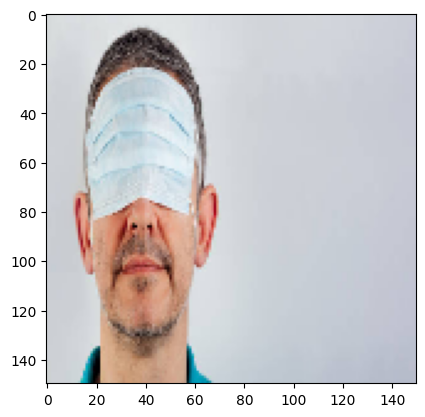

In [ ]:
predict(val_data_path +'/val_004.jpg')